<a href="https://colab.research.google.com/github/1jamjam/PredictiveWins-ML/blob/main/AAC_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from prophet import Prophet
import seaborn as sns

In [ ]:
df = pd.read_csv("units.csv")

In [ ]:
df

,Date,Units Ordered
0,1/1/2024,6
1,1/2/2024,6
2,1/3/2024,2
3,1/4/2024,3
4,1/5/2024,4
...,...,...
308,11/4/2024,3
309,11/5/2024,1
310,11/6/2024,1
311,11/7/2024,2


In [ ]:
# Before we can visualize, we need to process and clean the data

In [ ]:
df.dtypes

,0
Date,object
Units Ordered,int64


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.dtypes

,0
Date,datetime64[ns]
Units Ordered,int64


<Axes: xlabel='Date', ylabel='Units Ordered'>

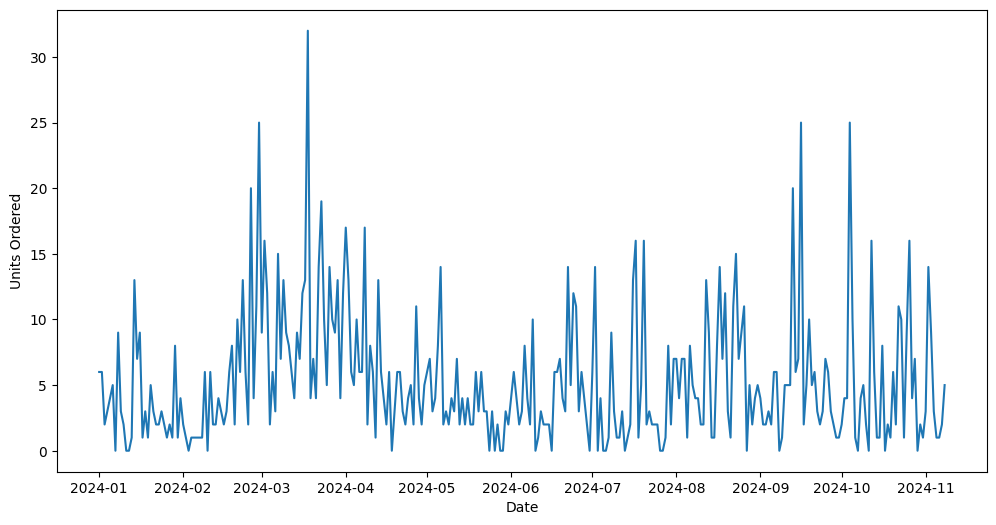

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x = 'Date', y = "Units Ordered", data = df)

In [ ]:
# Making the dataset suitable for Prophet

df = df.rename(columns={'Date': 'ds', 'Units Ordered': 'y'})

In [ ]:
df

,ds,y
0,2024-01-01,6
1,2024-01-02,6
2,2024-01-03,2
3,2024-01-04,3
4,2024-01-05,4
...,...,...
308,2024-11-04,3
309,2024-11-05,1
310,2024-11-06,1
311,2024-11-07,2


In [ ]:
split_date = "10-10-2024"
split_date = pd.to_datetime(split_date)
df_train = df.loc[df['ds'] <= split_date].copy()
df_test = df.loc[df['ds'] > split_date].copy()

In [ ]:
# Removing outliers and negative values

df['y'] = df['y'].apply(lambda x: max(x, 0))  # Replace negative values with zero

<ipython-input-52-f1a7d4445073>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = df['y'].apply(lambda x: max(x, 0))  # Replace negative values with zero


In [ ]:
from scipy import stats
df = df[(np.abs(stats.zscore(df['y'])) < 3)]

<Axes: xlabel='ds', ylabel='y'>

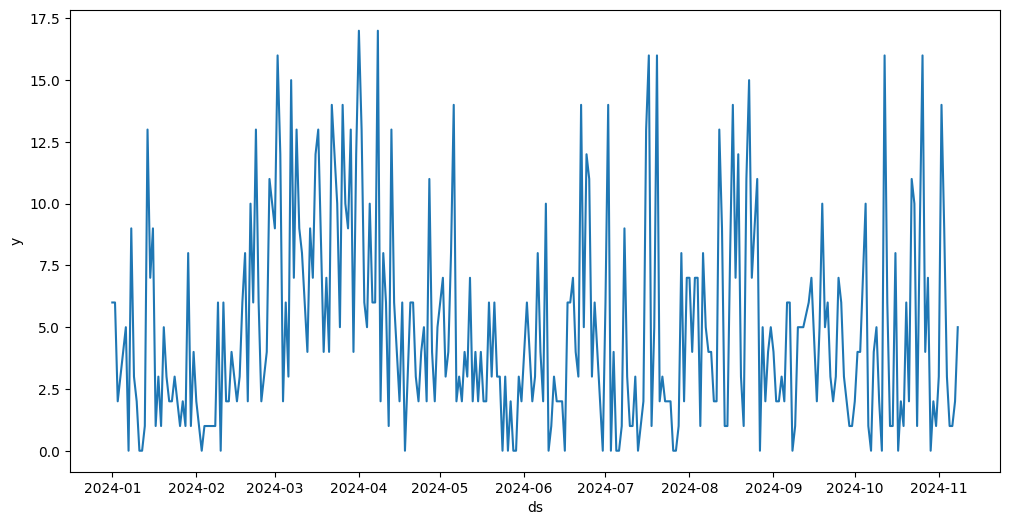

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x = 'ds', y = 'y', data = df)

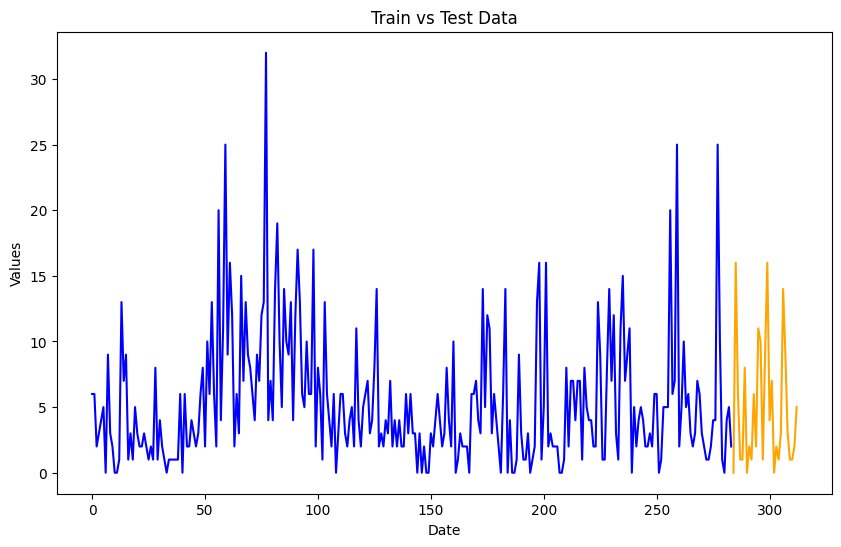

In [ ]:
# This visualizes about 78% of the data that the model will be training on (Blue)
# and the remaining 22% (Orange) which the model will be testing on.

plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(df_train.index, df_train['y'], label='Train Data', color='blue')

# Plot the test data
plt.plot(df_test.index, df_test['y'], label='Test Data', color='orange')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Train vs Test Data')

plt.show()

In [ ]:
model = Prophet()
model.fit(df_train)

df_test_fcst = model.predict(df_test)

df_test_fcst.head()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpymd1h3zi/omfoxasa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpymd1h3zi/_7a4ozvs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87956', 'data', 'file=/tmp/tmpymd1h3zi/omfoxasa.json', 'init=/tmp/tmpymd1h3zi/_7a4ozvs.json', 'output', 'file=/tmp/tmpymd1h3zi/prophet_modell1awfutp/prophet_model-20241110171158.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:11:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:11:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2024-10-11,5.088580,-1.002676,11.083474,5.088580,5.088580,0.148347,0.148347,0.148347,0.148347,0.148347,0.148347,0.0,0.0,0.0,5.236927
1,2024-10-12,5.086819,-0.122732,12.388515,5.086819,5.086819,0.624767,0.624767,0.624767,0.624767,0.624767,0.624767,0.0,0.0,0.0,5.711586
2,2024-10-13,5.085058,-1.522433,11.429370,5.085054,5.085060,-0.398278,-0.398278,-0.398278,-0.398278,-0.398278,-0.398278,0.0,0.0,0.0,4.686779
3,2024-10-14,5.083296,0.518105,13.037248,5.083286,5.083304,1.769756,1.769756,1.769756,1.769756,1.769756,1.769756,0.0,0.0,0.0,6.853053
4,2024-10-15,5.081535,-2.304056,10.491609,5.081517,5.081552,-0.765239,-0.765239,-0.765239,-0.765239,-0.765239,-0.765239,0.0,0.0,0.0,4.316296


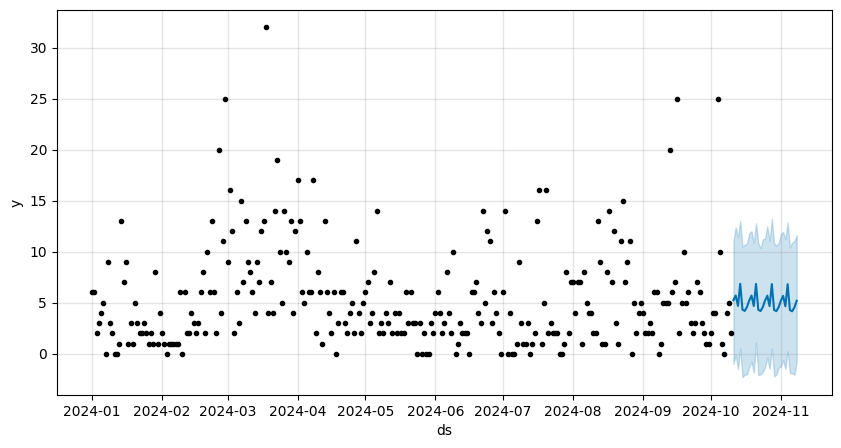

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
fig = model.plot(df_test_fcst, ax=ax)
plt.show()

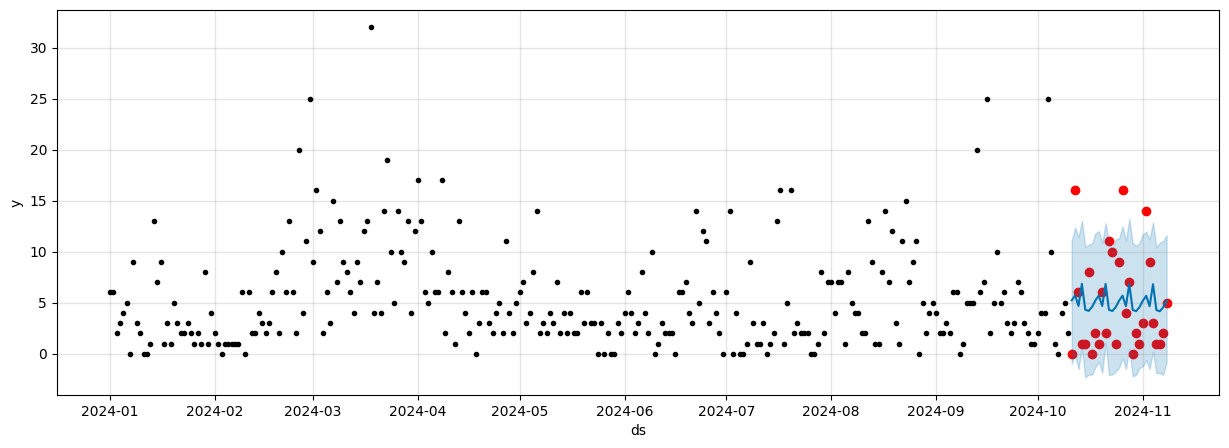

In [ ]:
#Comparing Forecast to Actuals
# Plot forecast along with actual values

f, ax = plt.subplots(figsize=(15,5))
ax.scatter(df_test['ds'], df_test['y'], color = 'r')
fig = model.plot(df_test_fcst, ax=ax)

In [ ]:
# Evaluating the model using Error Metrics

#Mean Squared Error
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

np.sqrt(mean_squared_error(y_true=df_test['y'],
                           y_pred = df_test_fcst['yhat']))

4.758760952371206

In [ ]:
# Predicting Into the Future!!

future = model.make_future_dataframe(periods = 60, include_history = False)
forecast = model.predict(future)

forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2024-10-11,5.088580,-0.747900,11.364403,5.088580,5.088580,0.148347,0.148347,0.148347,0.148347,0.148347,0.148347,0.0,0.0,0.0,5.236927
1,2024-10-12,5.086819,-0.550460,11.799073,5.086819,5.086819,0.624767,0.624767,0.624767,0.624767,0.624767,0.624767,0.0,0.0,0.0,5.711586
2,2024-10-13,5.085058,-2.179094,10.728893,5.085056,5.085064,-0.398278,-0.398278,-0.398278,-0.398278,-0.398278,-0.398278,0.0,0.0,0.0,4.686779
3,2024-10-14,5.083296,0.507533,13.034903,5.083289,5.083309,1.769756,1.769756,1.769756,1.769756,1.769756,1.769756,0.0,0.0,0.0,6.853053
4,2024-10-15,5.081535,-2.643766,10.335054,5.081520,5.081558,-0.765239,-0.765239,-0.765239,-0.765239,-0.765239,-0.765239,0.0,0.0,0.0,4.316296
5,2024-10-16,5.079774,-2.043492,10.565426,5.079746,5.079808,-0.885595,-0.885595,-0.885595,-0.885595,-0.885595,-0.885595,0.0,0.0,0.0,4.194179
6,2024-10-17,5.078013,-1.844050,10.868459,5.077974,5.078059,-0.493758,-0.493758,-0.493758,-0.493758,-0.493758,-0.493758,0.0,0.0,0.0,4.584255
7,2024-10-18,5.076252,-0.995480,11.785708,5.076197,5.076315,0.148347,0.148347,0.148347,0.148347,0.148347,0.148347,0.0,0.0,0.0,5.224599
8,2024-10-19,5.074490,-0.636114,12.180180,5.074422,5.074568,0.624767,0.624767,0.624767,0.624767,0.624767,0.624767,0.0,0.0,0.0,5.699258
9,2024-10-20,5.072729,-1.593528,11.488921,5.072648,5.072829,-0.398278,-0.398278,-0.398278,-0.398278,-0.398278,-0.398278,0.0,0.0,0.0,4.674451
